# Classificador de Renda Anual

Ao contrário do que ocorre no Brasil, nos Estados Unidos a faixa salarial é definida anualmente. Isso significa que o importante não é o ganho mensal, mas sim anual. Isso pode até parecer um pouco estranho em relação à nossa cultura, porém é uma equivalência bem simples, alguém que ganharia, por exemplo, 50 (cinquenta) mil reais por ano nos padrões americanos, seria alguém que, segundo o padrão brasileiro, ganharia o valor de aproximadamente 4.166 (quatro mil cento e sessenta e seis) reais por mês.


## Objetivo: 
Este projeto tem por objetivo de através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano.

### Habilidade Avaliadas

* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

## Dataset:
O conjunto de dados para este projeto é originário do Repositório de A prendizado de Máquina da UCI(https://archive.ics.uci.edu/ml/datasets/Adult)

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

In [2]:
df = pd.read_csv('adult.data')

# Conhecendo a base de dados


In [3]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.count()

age                48842
workclass          48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
sex                48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

# Colunas do dataset

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

In [5]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# variaveis categoricas 
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


# Análise exploratória 

In [7]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

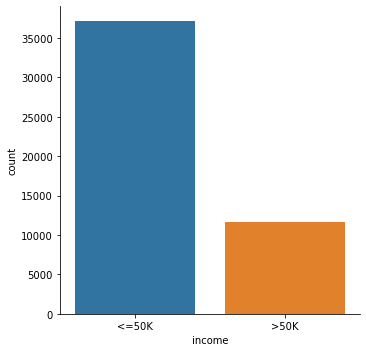

In [8]:
# distribuição das classes(variável income)
sns.catplot(x='income', kind='count', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

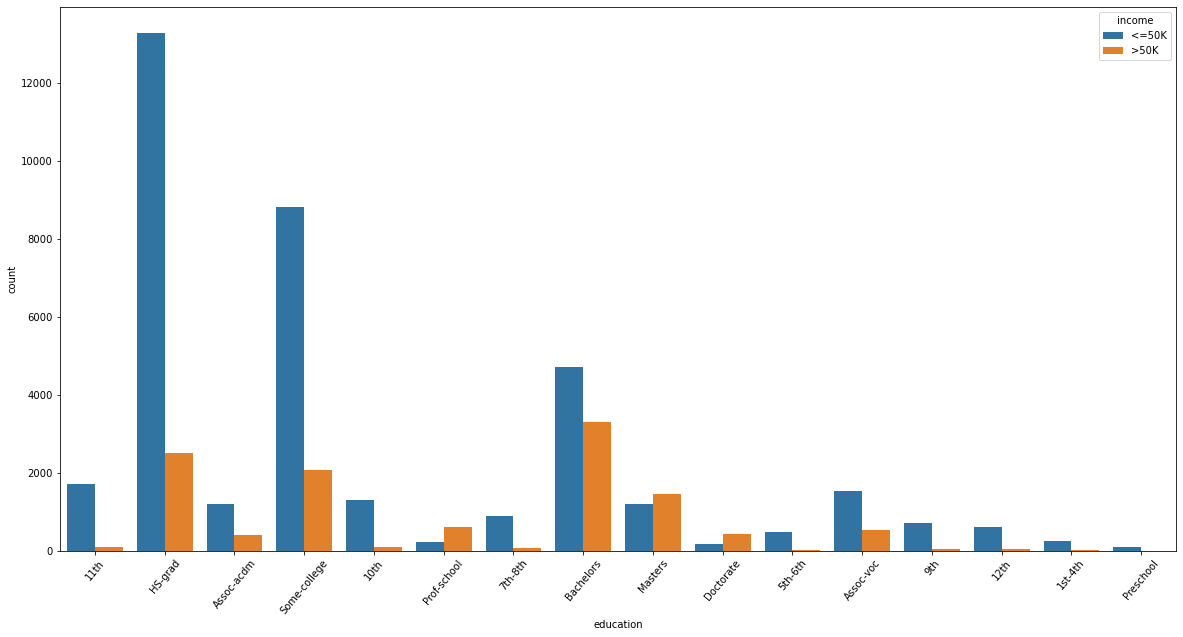

In [9]:
# visualizando a distribuição das classes por nível de escolaridade
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'education',  hue = 'income')
plt.xticks(rotation=50)

In [10]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

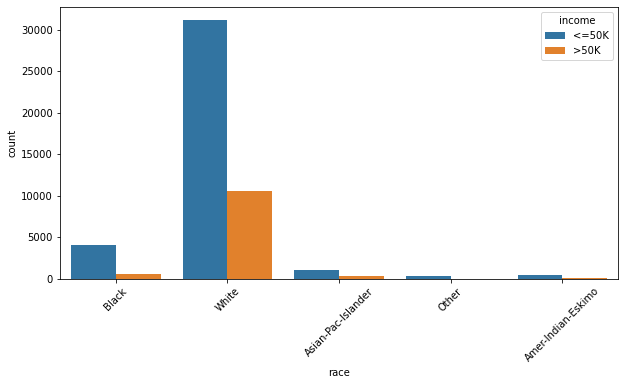

In [11]:
# relação (scatter) das colunas age,sex e race com a coluna income.
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'race',  hue = 'income')
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

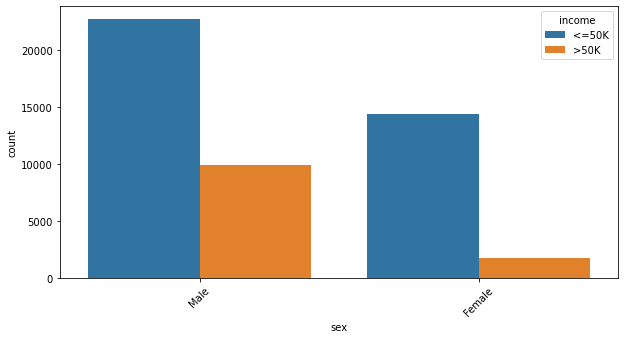

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'sex',  hue = 'income')
plt.xticks(rotation=45)

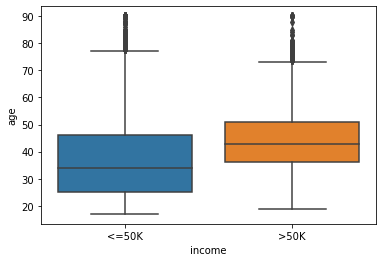

In [13]:
sns.boxplot(x='income', y='age', data=df)

# Análise dos Dados

In [14]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
# Criando uma nova coluna com a renda final
df['capital_last'] = df['capital-gain'] - df['capital-loss']

In [16]:
df['capital_last']

0            0
1            0
2            0
3         7688
4            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital_last, Length: 48842, dtype: int64

In [17]:
# Removendo as features irrelevantes.
# A coluna 'educational-num' está preenchida com o código referente a cada nível de escolaridade, dessa maneira podemos excluir a coluna 'education'.
# As colunas 'capital-gain' e 'capital-loss' estão representadas pela nova coluna capital_last

def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)

In [18]:
remove_features(['educational-num', 'capital-gain', 'capital-loss'])

In [19]:
# transformando variaveis categoricas em númericas
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#
#for i in df.columns:
#    df[i] = encoder.fit_transform(df[i])

In [20]:
# selecionando apenas as colunas categóricas
cols = df[df.select_dtypes(['object']).columns]
# iterando sobre as colunas para transformar em numéricas com label encoder
for c in cols:
    encoding = LabelEncoder()
# transformando
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
# aplicando o get_dummies
df = pd.get_dummies(df)

In [21]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital_last
0,25,4,1,4,7,3,2,1,40,39,0,0
1,38,4,11,2,5,0,4,1,50,39,0,0
2,28,2,7,2,11,0,4,1,40,39,1,0
3,44,4,15,2,7,0,2,1,40,39,1,7688
4,18,0,15,4,0,3,4,0,30,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,7,2,13,5,4,0,38,39,0,0
48838,40,4,11,2,7,0,4,1,40,39,1,0
48839,58,4,11,6,1,4,4,0,40,39,0,0
48840,22,4,11,4,1,3,4,1,20,39,0,0


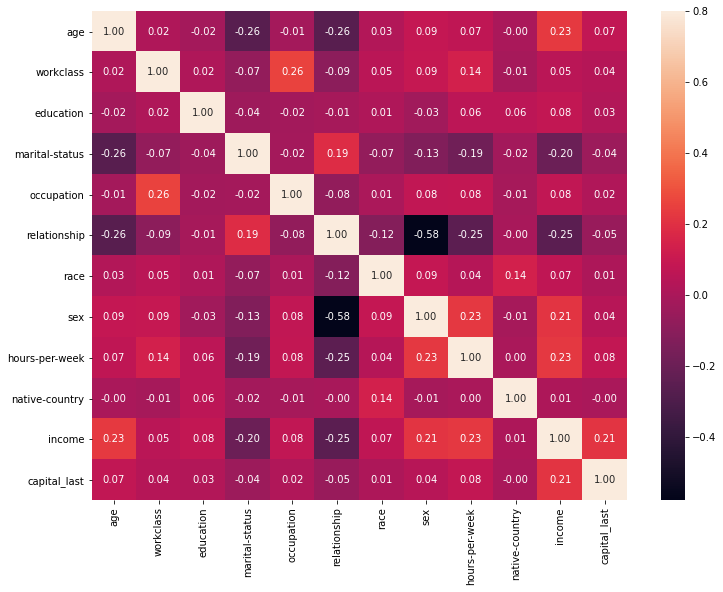

In [22]:
corr = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')

# Verificando as features mais importantes para o modelo

In [23]:
# separando as classes dos dados
previsores = df.drop('income', axis=1)
classe = df['income']

In [24]:
clf=RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(previsores, classe)

RandomForestClassifier(random_state=7)

In [25]:
feature_imp = pd.Series(clf.feature_importances_,index=previsores.columns).sort_values(ascending=False)
feature_imp

age               0.220628
capital_last      0.184402
relationship      0.115041
hours-per-week    0.109689
education         0.101943
occupation        0.089522
marital-status    0.076452
workclass         0.051063
native-country    0.022270
race              0.017788
sex               0.011202
dtype: float64

In [26]:
# selecionando as features de maior importancia
features_importance = []
for feature, importance in feature_imp.iteritems(): # Retorna um iterador sobre os pares do dicionário (chave, valor).
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_importance.append(feature)

age: 22%
capital_last: 18%
relationship: 12%
hours-per-week: 11%
education: 10%
occupation: 9%
marital-status: 8%
workclass: 5%


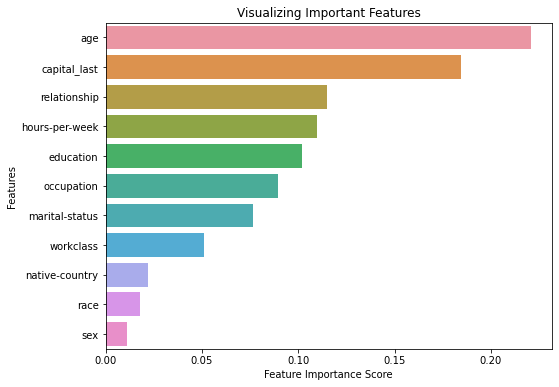

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [28]:
# Selecionando as features de maior importância.
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

age: 22%
capital_last: 18%
relationship: 12%
hours-per-week: 11%
education: 10%
occupation: 9%
marital-status: 8%
workclass: 5%


In [29]:
# Treinando os modelos utilizando apenas as features selecionadas.
previsores = df[features_selected]
classe = df['income']


**Criando modelo de Machine Learning a partir de cada algoritmo**

Os dados estão em diferentes escalas e isso pode prejudicar a performance de alguns algoritmos, logo deve-se aplicar a Padronização ao conjunto de dados (colocando-os na mesma escala). Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e desvio padrão igual a 1.

**Observação:**

O modelo SVM não foi utilizado por não funcionar bem grandes conjuntos de dados, uma vez que o tempo de treinamento necessário é maior.

In [30]:
pipelines = []

pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []


# percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    cross_val_result = model_selection.cross_val_score(modelo,
                                                      previsores,
                                                      classe,
                                                      cv=kfold,
                                                      scoring='accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.791348 (0.003994)
Scaled-KNN: 0.833238 (0.004668)
Scaled-CART: 0.819438 (0.003657)
Scaled-NB: 0.802649 (0.004396)
Scaled-RF: 0.847918 (0.003783)


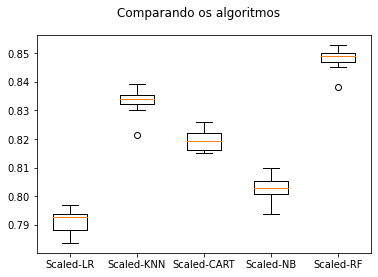

In [31]:
# De acordo com os resultados anteriores, os modelos criados com Knn e Random Forest apresentaram 
# os melhores valores de acurácia e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Fazendo o tunning do modelo

Embora o Random Forest tenha apresentado o menor erro após a padronização dos dados, pode-se ainda otimizá-lo com o ajuste dos seus parâmetros.

Faremos a mesma coisa como o algoritmo Decision Tree.

### Random Forest

In [32]:
# definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# possiveis valores para os estimators
val_estimators = [20, 50, 100, 150, 200]

# valores para o criterio de divisão
val_criterion = ['gini', 'entropy']

# dicionario que recebe a lista com os parâmetros para o gridsearch
parametros_grid = dict(n_estimators = val_estimators,
                      criterion = val_criterion)

# criando o modelo
modelo_random = RandomForestClassifier()

# definindo k
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferentes combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.84622,std:0.00317,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.84614,std:0.00457,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.847,std:0.00361,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.84773,std:0.00321,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.8488,std:0.00304,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.84673,std:0.00329,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.84743,std:0.0043,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.84718,std:0.00394,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.84769,std:0.00358,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.84794,std:0.0034,params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 200, 'criterion': 'gini'}, Score:0.8487981728821034


## Decision Tree

In [33]:
# definindo o scaler
scaler = StandardScaler()

# definindo uma lista com a profundidade máxima da árvore
max_depth = list(range(1,31))

# prossiveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth)

# criando o modelo
tree = DecisionTreeClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferenets combinações com os valores de K
grid = RandomizedSearchCV(estimator = tree, param_distributions = valores_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado  
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.80474,std:0.00278,params:{'max_depth': 2, 'criterion': 'entropy'}
mean:0.85044,std:0.00205,params:{'max_depth': 15, 'criterion': 'entropy'}
mean:0.85076,std:0.00419,params:{'max_depth': 13, 'criterion': 'gini'}
mean:0.80478,std:0.00275,params:{'max_depth': 3, 'criterion': 'entropy'}
mean:0.82034,std:0.00326,params:{'max_depth': 4, 'criterion': 'gini'}
mean:0.85267,std:0.0033,params:{'max_depth': 12, 'criterion': 'entropy'}
mean:0.85205,std:0.00327,params:{'max_depth': 13, 'criterion': 'entropy'}
mean:0.83827,std:0.00391,params:{'max_depth': 20, 'criterion': 'gini'}
mean:0.84681,std:0.00365,params:{'max_depth': 16, 'criterion': 'gini'}
mean:0.82908,std:0.00473,params:{'max_depth': 5, 'criterion': 'entropy'}

Melhor parâmetro:{'max_depth': 12, 'criterion': 'entropy'}, Score:0.8526677799042179


# Preparando a versão final do modelo

In [34]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
modelo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)
modelo_tree.fit(previsores,classe)
result_tree = cross_val_predict(modelo_tree,previsores, classe, cv=10)


print(f'Acurácia: {accuracy_score(classe,result_tree)}')
print('\n',confusion_matrix(classe,result_tree))
print('\n',classification_report(classe,result_tree))

Acurácia: 0.8519921379140903

 [[34448  2707]
 [ 4522  7165]]

               precision    recall  f1-score   support

           0       0.88      0.93      0.91     37155
           1       0.73      0.61      0.66     11687

    accuracy                           0.85     48842
   macro avg       0.80      0.77      0.78     48842
weighted avg       0.85      0.85      0.85     48842



# Persistindo o Modelo treinado para o disco

### persistindo com pickle

In [37]:
#filename = 'model_final.sav'
pickle.dump(modelo_tree, open('modelo.sav', 'wb'))
pickle.load(open('modelo.sav', 'rb'))

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)